In [5]:
import sys
sys.executable
import pandas as pd
import numpy as np
import scipy
import locale

In [6]:
rawCsvData=pd.read_csv("data/AQStationData/Barcelona (Eixample).csv", decimal=',')
dfContaminants=rawCsvData.copy()
# we will only load data from area_urba = "urban" and tipus_estacio = "traffic" or "background"

In [7]:
dfContaminants.describe

<bound method NDFrame.describe of       codi_eoi           nom_estacio                     data  magnitud  \
0      8019043  Barcelona (Eixample)  2020-09-04T00:00:00.000         6   
1      8019043  Barcelona (Eixample)  2020-09-04T00:00:00.000         8   
2      8019043  Barcelona (Eixample)  2020-06-07T00:00:00.000        14   
3      8019043  Barcelona (Eixample)  2020-09-15T00:00:00.000        12   
4      8019043  Barcelona (Eixample)  2020-09-08T00:00:00.000         1   
...        ...                   ...                      ...       ...   
9781   8019043  Barcelona (Eixample)  2018-07-06T00:00:00.000        10   
9782   8019043  Barcelona (Eixample)  2018-07-26T00:00:00.000        10   
9783   8019043  Barcelona (Eixample)  2018-09-23T00:00:00.000         1   
9784   8019043  Barcelona (Eixample)  2018-03-21T00:00:00.000        10   
9785   8019043  Barcelona (Eixample)  2018-04-13T00:00:00.000         1   

     contaminant unitats tipus_estacio area_urbana  codi_ine   mu

In [8]:
dfContaminants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9786 entries, 0 to 9785
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   codi_eoi         9786 non-null   int64 
 1   nom_estacio      9786 non-null   object
 2   data             9786 non-null   object
 3   magnitud         9786 non-null   int64 
 4   contaminant      9786 non-null   object
 5   unitats          9786 non-null   object
 6   tipus_estacio    9786 non-null   object
 7   area_urbana      9786 non-null   object
 8   codi_ine         9786 non-null   int64 
 9   municipi         9786 non-null   object
 10  codi_comarca     9786 non-null   int64 
 11  nom_comarca      9786 non-null   object
 12  h01              9700 non-null   object
 13  h02              9525 non-null   object
 14  h03              9677 non-null   object
 15  h04              9696 non-null   object
 16  h05              9695 non-null   object
 17  h06              9693 non-null   

In [9]:
dfContaminants.describe()

,codi_eoi,magnitud,codi_ine,codi_comarca,altitud
count,9786.0,9786.000000,9786.0,9786.0,9786.0
mean,8019043.0,8.282036,8019.0,13.0,26.0
std,0.0,3.953919,0.0,0.0,0.0
min,8019043.0,1.000000,8019.0,13.0,26.0
25%,8019043.0,6.000000,8019.0,13.0,26.0
50%,8019043.0,8.000000,8019.0,13.0,26.0
75%,8019043.0,12.000000,8019.0,13.0,26.0
max,8019043.0,14.000000,8019.0,13.0,26.0


In [10]:
dfContaminants.head()

,codi_eoi,nom_estacio,data,magnitud,contaminant,unitats,tipus_estacio,area_urbana,codi_ine,municipi,...,h19,h20,h21,h22,h23,h24,altitud,latitud,longitud,geocoded_column
0,8019043,Barcelona (Eixample),2020-09-04T00:00:00.000,6,CO,mg/m3,traffic,urban,8019,Barcelona,...,0.3,0.3,0.4,0.3,0.2,0.2,26,41.385315,2.1537998,POINT (2.1537998 41.385315)
1,8019043,Barcelona (Eixample),2020-09-04T00:00:00.000,8,NO2,µg/m3,traffic,urban,8019,Barcelona,...,46,42,40,39,33,22,26,41.385315,2.1537998,POINT (2.1537998 41.385315)
2,8019043,Barcelona (Eixample),2020-06-07T00:00:00.000,14,O3,µg/m3,traffic,urban,8019,Barcelona,...,39,44,37,23,22,26,26,41.385315,2.1537998,POINT (2.1537998 41.385315)
3,8019043,Barcelona (Eixample),2020-09-15T00:00:00.000,12,NOX,µg/m3,traffic,urban,8019,Barcelona,...,75,56,68,45,35,28,26,41.385315,2.1537998,POINT (2.1537998 41.385315)
4,8019043,Barcelona (Eixample),2020-09-08T00:00:00.000,1,SO2,µg/m3,traffic,urban,8019,Barcelona,...,1,1,1,1,1,1,26,41.385315,2.1537998,POINT (2.1537998 41.385315)


In [11]:
# remove unnecessary columns
# codi_eoi (we have a nom_estacio for the station , magnitud (just a number corresponding to the contaminant),
#              unitats (fixed for each contaminant),
#              area_urbana (only "urban" stations used), codi_ine (redundant), municipi (redundant),
#              codi_comarca, nom_comarca, altitud, latitud, longitud, geocoded_column (redundant - correspond to station)


In [12]:
dfContaminants=dfContaminants.drop(['codi_eoi', 'magnitud','unitats', 'area_urbana', 'codi_ine', 'municipi','codi_comarca', 'nom_comarca', 'altitud','latitud','longitud','geocoded_column'], axis=1)



In [13]:
dfContaminants.head()



,nom_estacio,data,contaminant,tipus_estacio,h01,h02,h03,h04,h05,h06,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
0,Barcelona (Eixample),2020-09-04T00:00:00.000,CO,traffic,0.2,NaN,0.2,0.2,0.2,0.2,...,0.3,0.3,0.3,0.3,0.3,0.3,0.4,0.3,0.2,0.2
1,Barcelona (Eixample),2020-09-04T00:00:00.000,NO2,traffic,31,32,34,22,17,18,...,55,54,57,47,46,42,40,39,33,22
2,Barcelona (Eixample),2020-06-07T00:00:00.000,O3,traffic,76,64,58,61,51,46,...,37,40,45,48,39,44,37,23,22,26
3,Barcelona (Eixample),2020-09-15T00:00:00.000,NOX,traffic,16,12,23,46,24,53,...,61,51,76,73,75,56,68,45,35,28
4,Barcelona (Eixample),2020-09-08T00:00:00.000,SO2,traffic,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [14]:
# Force h_num_ columns to be numeric.  Invalid values -> null
dfContaminants.info()
dfContaminants.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9786 entries, 0 to 9785
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   nom_estacio    9786 non-null   object
 1   data           9786 non-null   object
 2   contaminant    9786 non-null   object
 3   tipus_estacio  9786 non-null   object
 4   h01            9700 non-null   object
 5   h02            9525 non-null   object
 6   h03            9677 non-null   object
 7   h04            9696 non-null   object
 8   h05            9695 non-null   object
 9   h06            9693 non-null   object
 10  h07            9690 non-null   object
 11  h08            9688 non-null   object
 12  h09            9674 non-null   object
 13  h10            9649 non-null   object
 14  h11            9463 non-null   object
 15  h12            9372 non-null   object
 16  h13            9383 non-null   object
 17  h14            9391 non-null   object
 18  h15            9461 non-null

nom_estacio        0
data               0
contaminant        0
tipus_estacio      0
h01               86
h02              261
h03              109
h04               90
h05               91
h06               93
h07               96
h08               98
h09              112
h10              137
h11              323
h12              414
h13              403
h14              395
h15              325
h16              272
h17              118
h18               76
h19               73
h20               71
h21               73
h22               74
h23               76
h24               74
dtype: int64

In [15]:
dfContaminants['h01']=pd.to_numeric(dfContaminants['h01'])
dfContaminants['h02']=pd.to_numeric(dfContaminants['h02'])
dfContaminants['h03']=pd.to_numeric(dfContaminants['h03'])
dfContaminants['h04']=pd.to_numeric(dfContaminants['h04'])
dfContaminants['h05']=pd.to_numeric(dfContaminants['h05'])
dfContaminants['h06']=pd.to_numeric(dfContaminants['h06'])
dfContaminants['h07']=pd.to_numeric(dfContaminants['h07'])
dfContaminants['h08']=pd.to_numeric(dfContaminants['h08'])
dfContaminants['h09']=pd.to_numeric(dfContaminants['h09'])
dfContaminants['h10']=pd.to_numeric(dfContaminants['h10'])
dfContaminants['h11']=pd.to_numeric(dfContaminants['h11'])
dfContaminants['h12']=pd.to_numeric(dfContaminants['h12'])
dfContaminants['h13']=pd.to_numeric(dfContaminants['h13'])
dfContaminants['h14']=pd.to_numeric(dfContaminants['h14'])
dfContaminants['h15']=pd.to_numeric(dfContaminants['h15'])
dfContaminants['h16']=pd.to_numeric(dfContaminants['h16'])
dfContaminants['h17']=pd.to_numeric(dfContaminants['h17'])
dfContaminants['h18']=pd.to_numeric(dfContaminants['h18'])
dfContaminants['h19']=pd.to_numeric(dfContaminants['h19'])
dfContaminants['h20']=pd.to_numeric(dfContaminants['h20'])
dfContaminants['h21']=pd.to_numeric(dfContaminants['h21'])
dfContaminants['h22']=pd.to_numeric(dfContaminants['h22'])
dfContaminants['h23']=pd.to_numeric(dfContaminants['h23'])
dfContaminants['h24']=pd.to_numeric(dfContaminants['h24'])

dfContaminants["data"]=pd.to_datetime(dfContaminants["data"],format='%Y-%m-%d')


In [16]:
dfContaminants["data"]=pd.to_datetime(dfContaminants["data"],format='%Y-%m-%d')

In [17]:
# rename column "data" to be "fecha" and index on this column
dfContaminants.rename(columns={'data':'fecha'}, inplace=True)

In [18]:
# sort data frame by "fecha", "nom_estacio", "contaminant"

dfContaminants.sort_values(by=['fecha','nom_estacio','contaminant'], inplace=True)


In [19]:
dfContaminants.head()

,nom_estacio,fecha,contaminant,tipus_estacio,h01,h02,h03,h04,h05,h06,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
5560,Barcelona (Eixample),2017-01-01,NO,traffic,8.0,11.0,10.0,8.0,7.0,19.0,...,15.0,15.0,9.0,9.0,22.0,31.0,19.0,22.0,18.0,6.0
5964,Barcelona (Eixample),2017-01-01,NO2,traffic,51.0,63.0,53.0,46.0,45.0,40.0,...,33.0,36.0,34.0,43.0,61.0,70.0,67.0,56.0,50.0,30.0
5780,Barcelona (Eixample),2017-01-01,NOX,traffic,63.0,79.0,67.0,59.0,55.0,69.0,...,57.0,59.0,47.0,55.0,94.0,117.0,95.0,89.0,78.0,38.0
5888,Barcelona (Eixample),2017-01-01,O3,traffic,21.0,16.0,25.0,29.0,28.0,33.0,...,36.0,35.0,34.0,25.0,10.0,4.0,10.0,21.0,26.0,46.0
7063,Barcelona (Eixample),2017-01-01,SO2,traffic,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [20]:
dfContaminants.tail()

,nom_estacio,fecha,contaminant,tipus_estacio,h01,h02,h03,h04,h05,h06,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
1591,Barcelona (Eixample),2020-10-31,NO2,traffic,59.0,55.0,56.0,57.0,49.0,43.0,...,24.0,21.0,23.0,30.0,27.0,43.0,57.0,68.0,66.0,51.0
1565,Barcelona (Eixample),2020-10-31,NOX,traffic,228.0,198.0,170.0,178.0,81.0,69.0,...,37.0,30.0,32.0,40.0,33.0,62.0,79.0,122.0,121.0,66.0
1572,Barcelona (Eixample),2020-10-31,O3,traffic,1.0,1.0,1.0,2.0,1.0,1.0,...,62.0,67.0,67.0,54.0,50.0,29.0,13.0,4.0,3.0,12.0
1563,Barcelona (Eixample),2020-10-31,PM10,traffic,45.0,38.0,33.0,35.0,28.0,25.0,...,30.0,29.0,32.0,29.0,28.0,26.0,30.0,36.0,44.0,31.0
1561,Barcelona (Eixample),2020-10-31,SO2,traffic,2.0,2.0,2.0,2.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0


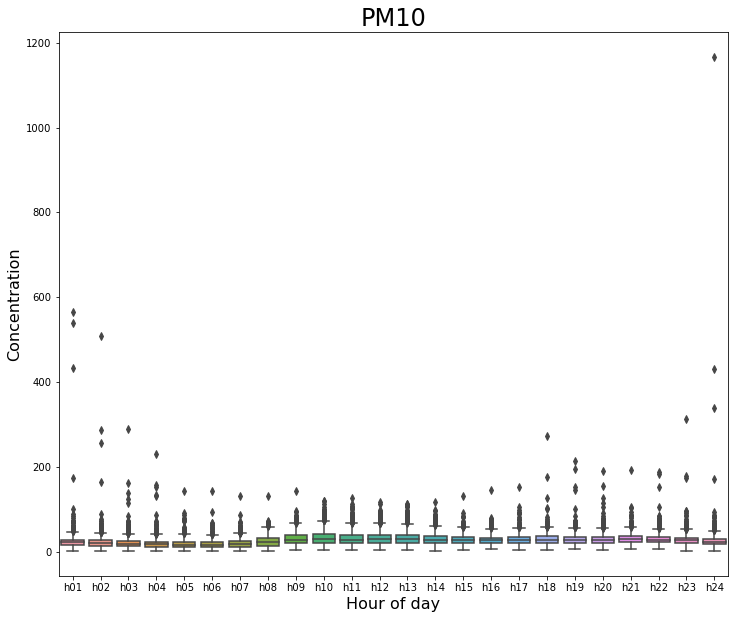

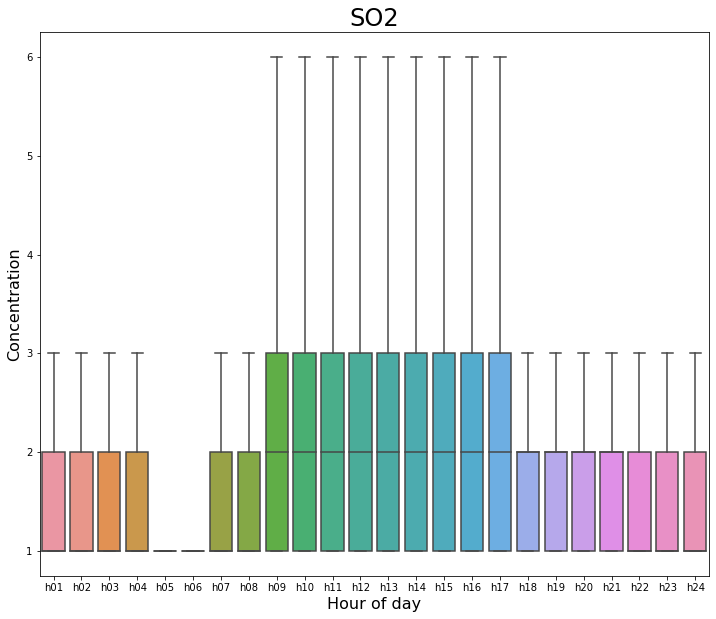

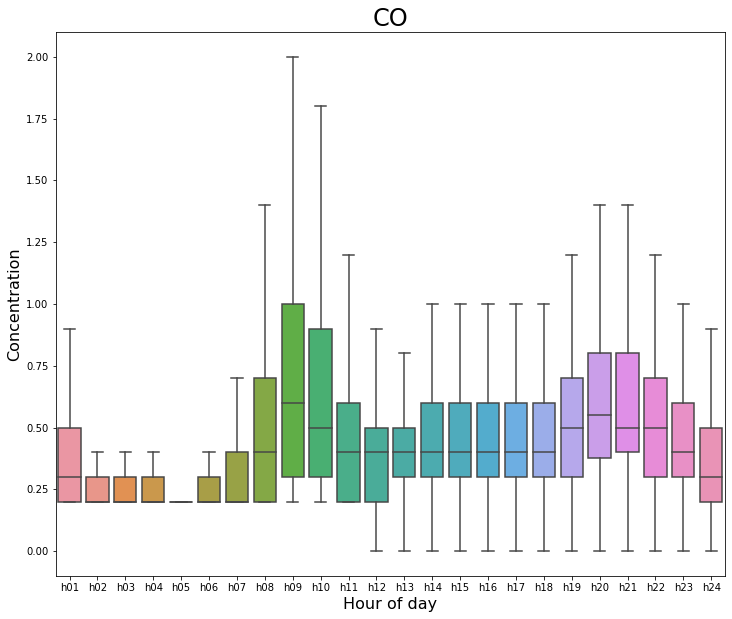

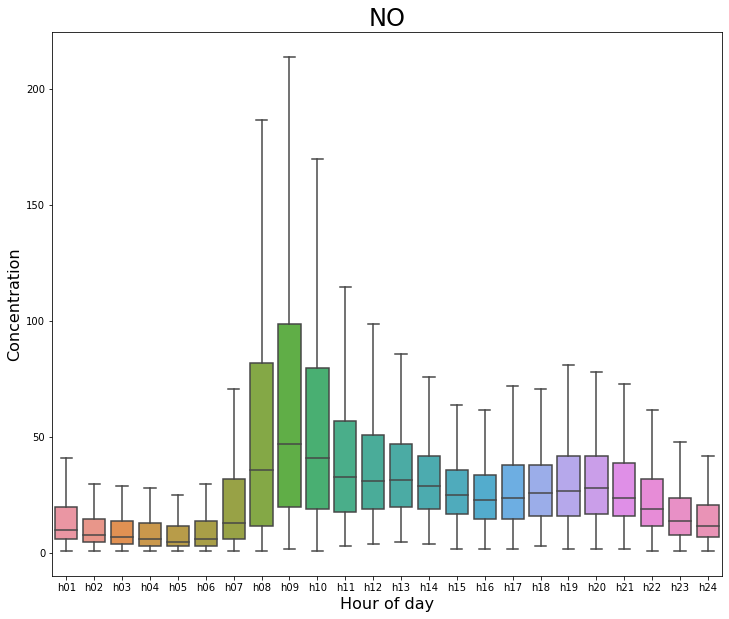

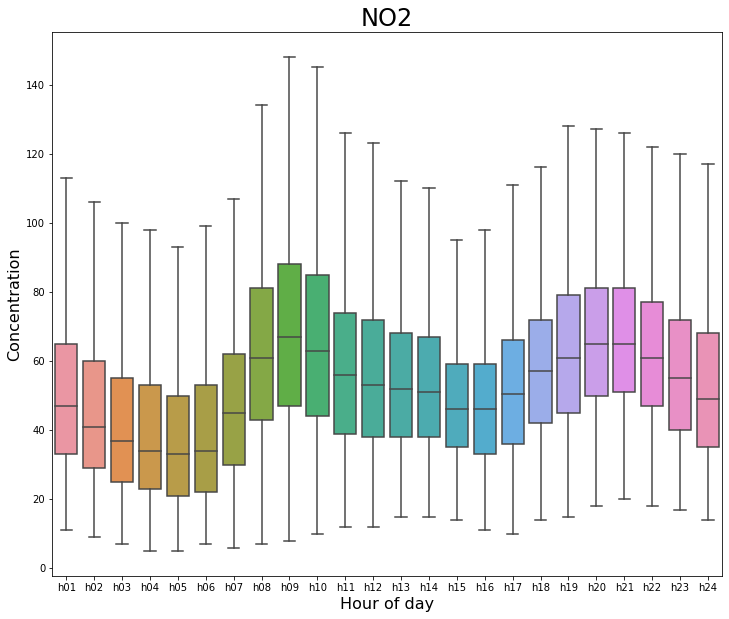

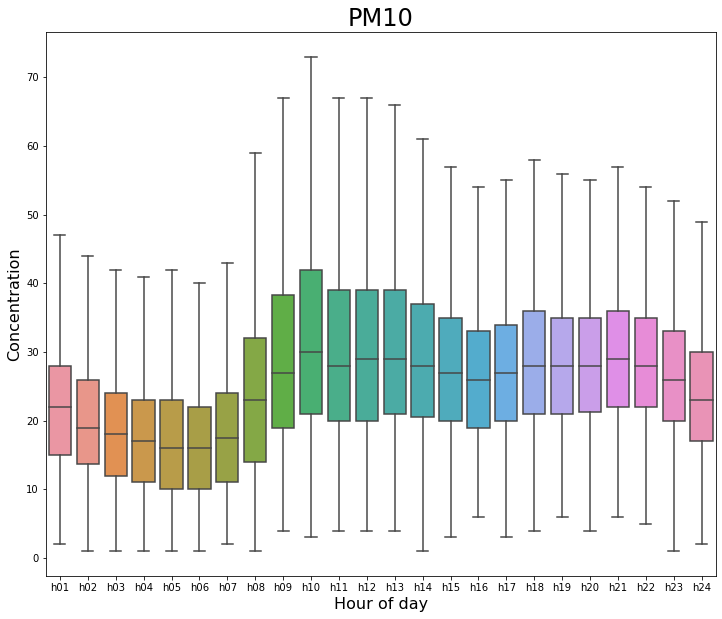

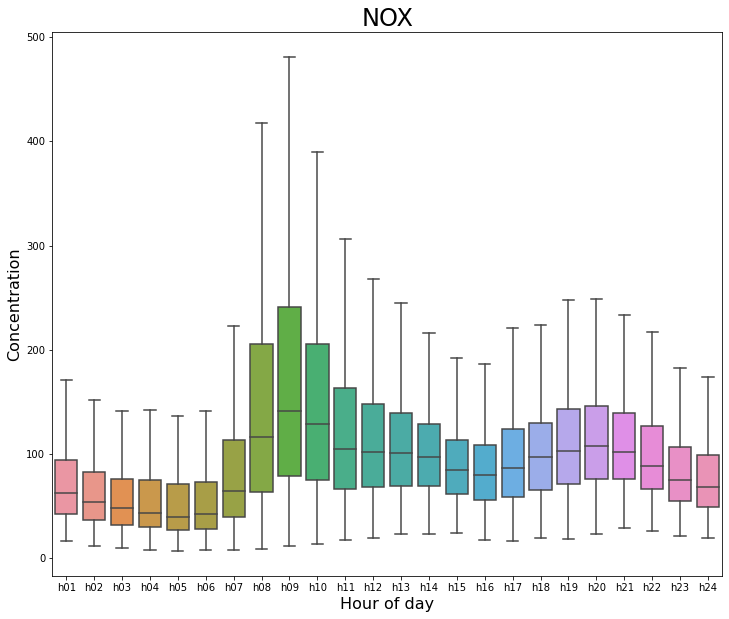

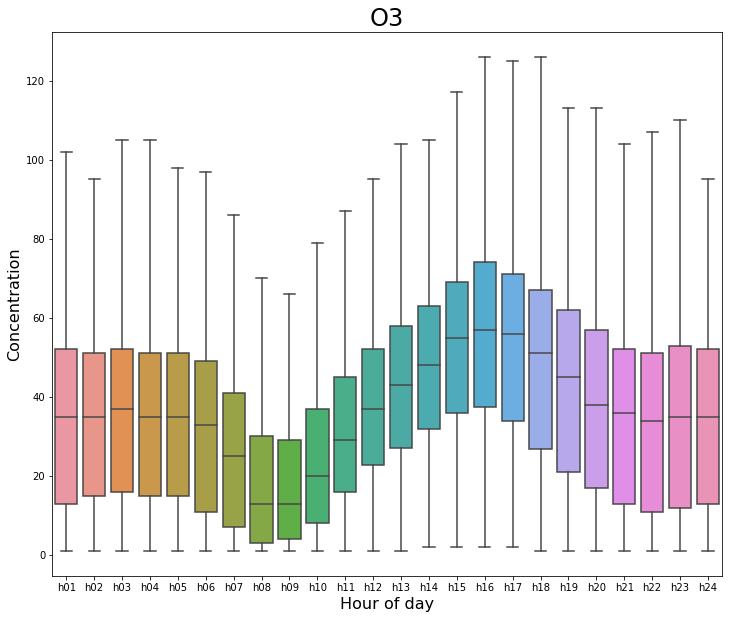

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
#dfContaminants[dfContaminants.contaminant=='PM10'].iloc[:,4:28]

fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(showfliers = True, x="variable", y="value", ax=ax,
            data=pd.melt(
                dfContaminants[(dfContaminants.contaminant=='PM10')
                               & (dfContaminants.fecha < '2020-01-01')].iloc[:,4:28]))

plt.xlabel("Hour of day", size=16)
plt.ylabel("Concentration", size=16)
plt.title("PM10", size=24)
plt.show()

fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(showfliers = False, x="variable", y="value", ax=ax,
            data=pd.melt(
                dfContaminants[(dfContaminants.contaminant=='SO2')
                               & (dfContaminants.fecha < '2020-01-01')].iloc[:,4:28]))

plt.xlabel("Hour of day", size=16)
plt.ylabel("Concentration", size=16)
plt.title("SO2", size=24)
plt.show()

fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(showfliers = False, x="variable", y="value", ax=ax,
            data=pd.melt(
                dfContaminants[(dfContaminants.contaminant=='CO')
                               & (dfContaminants.fecha < '2020-01-01')].iloc[:,4:28]))
plt.xlabel("Hour of day", size=16)
plt.ylabel("Concentration", size=16)
plt.title("CO", size=24)
plt.show()

fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(showfliers = False, x="variable", y="value", ax=ax,
            data=pd.melt(
                dfContaminants[(dfContaminants.contaminant=='NO')
                               & (dfContaminants.fecha < '2020-01-01')].iloc[:,4:28]))

plt.xlabel("Hour of day", size=16)
plt.ylabel("Concentration", size=16)
plt.title("NO", size=24)
plt.show()

fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(showfliers = False, x="variable", y="value", ax=ax,
            data=pd.melt(
                dfContaminants[(dfContaminants.contaminant=='NO2')
                               & (dfContaminants.fecha < '2020-01-01')].iloc[:,4:28]))

plt.xlabel("Hour of day", size=16)
plt.ylabel("Concentration", size=16)
plt.title("NO2", size=24)
plt.show()

fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(showfliers = False, x="variable", y="value", ax=ax,
            data=pd.melt(
                dfContaminants[(dfContaminants.contaminant=='PM10')
                               & (dfContaminants.fecha < '2020-01-01')].iloc[:,4:28]))

plt.xlabel("Hour of day", size=16)
plt.ylabel("Concentration", size=16)
plt.title("PM10", size=24)
plt.show()

fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(showfliers = False, x="variable", y="value", ax=ax,
            data=pd.melt(
                dfContaminants[(dfContaminants.contaminant=='NOX')
                               & (dfContaminants.fecha < '2020-01-01')].iloc[:,4:28]))

plt.xlabel("Hour of day", size=16)
plt.ylabel("Concentration", size=16)
plt.title("NOX", size=24)
plt.show()

fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(showfliers = False, x="variable", y="value", ax=ax,
            data=pd.melt(
                dfContaminants[(dfContaminants.contaminant=='O3')
                               & (dfContaminants.fecha < '2020-01-01')].iloc[:,4:28]))

plt.xlabel("Hour of day", size=16)
plt.ylabel("Concentration", size=16)
plt.title("O3", size=24)
plt.show()



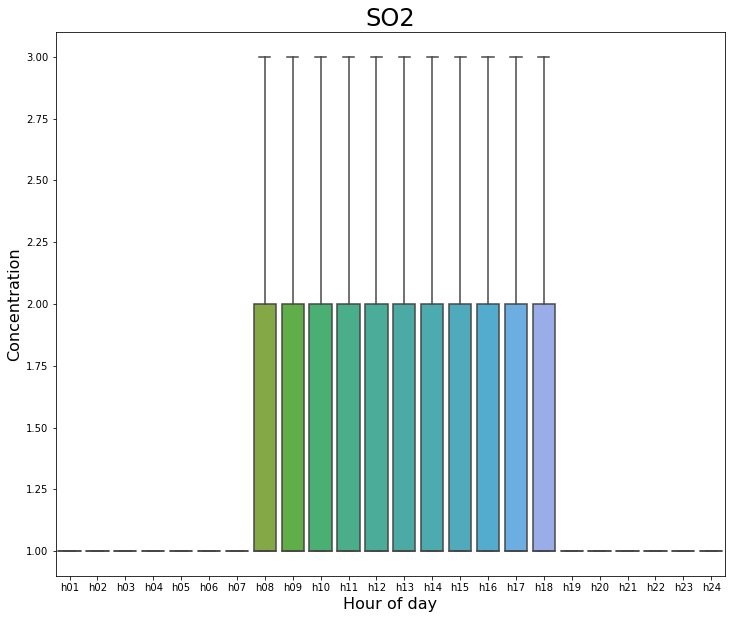

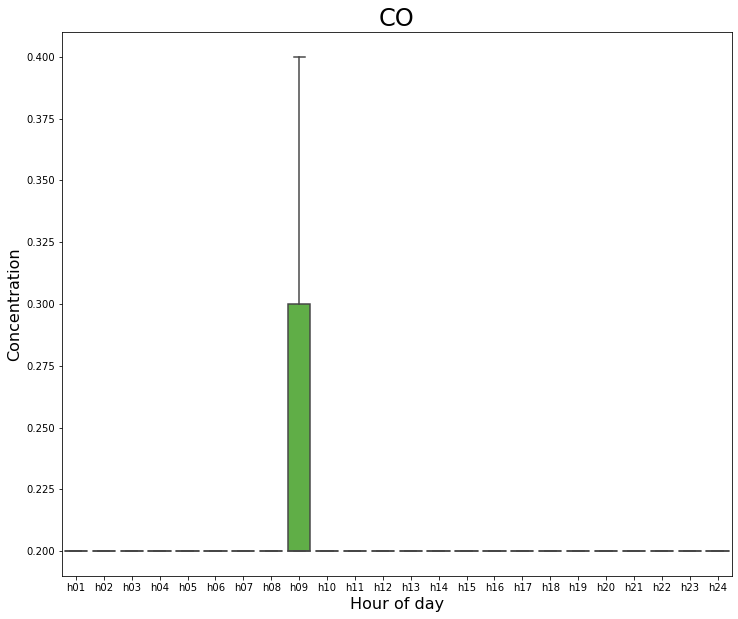

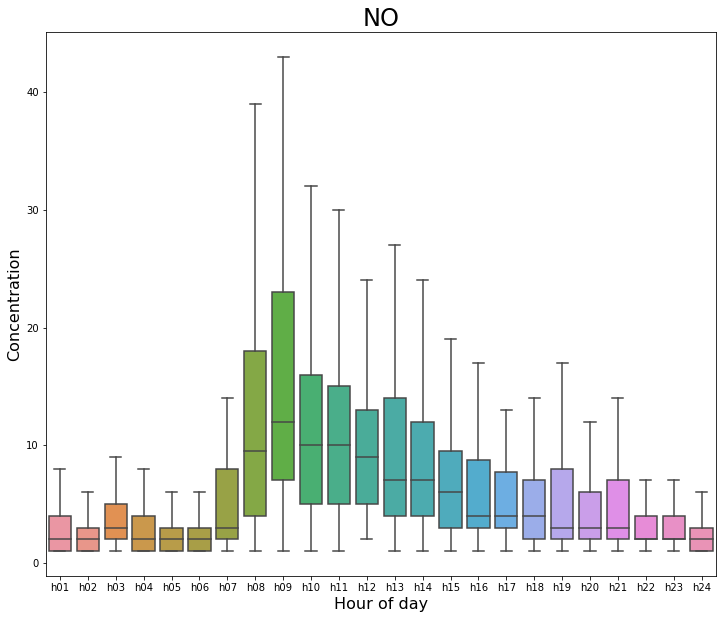

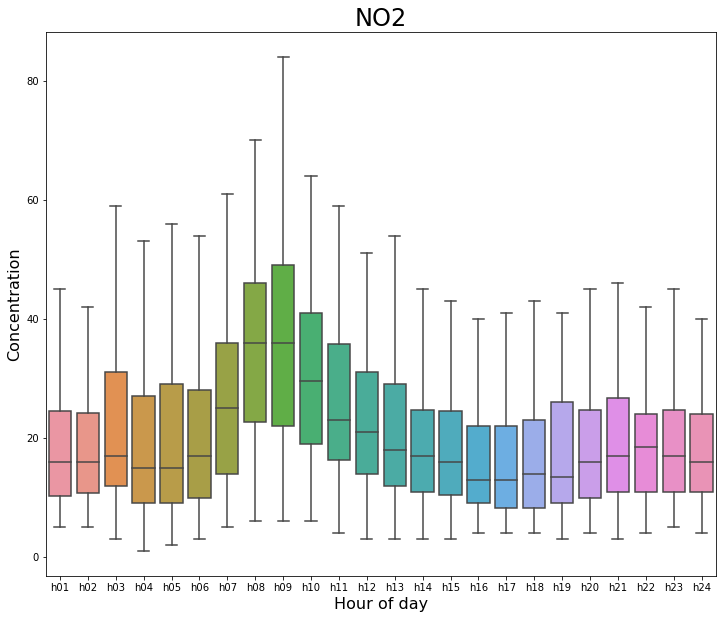

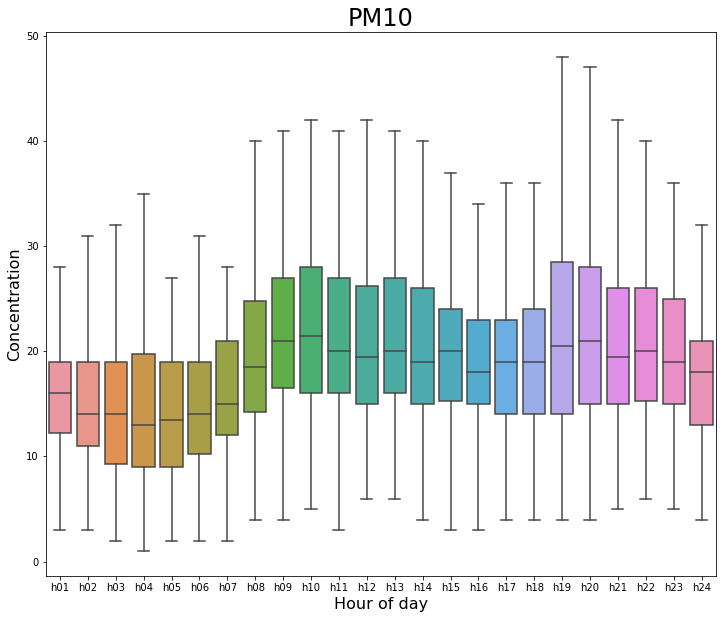

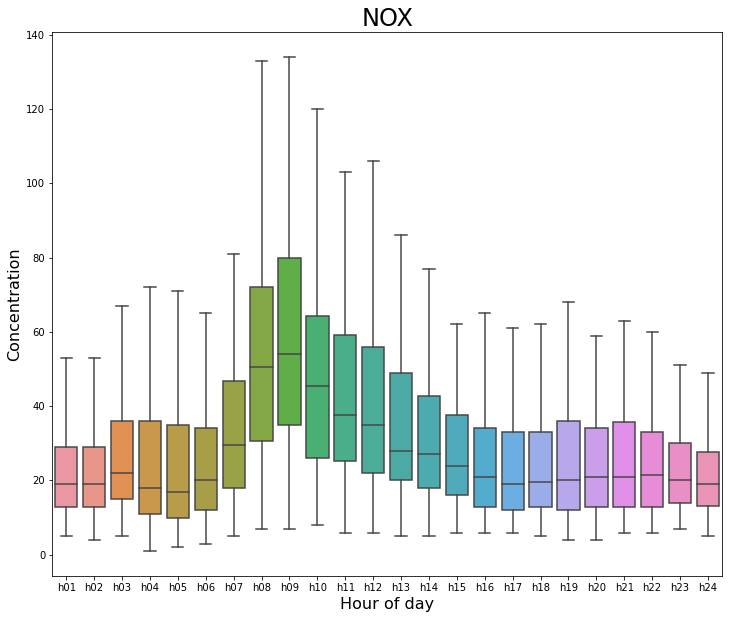

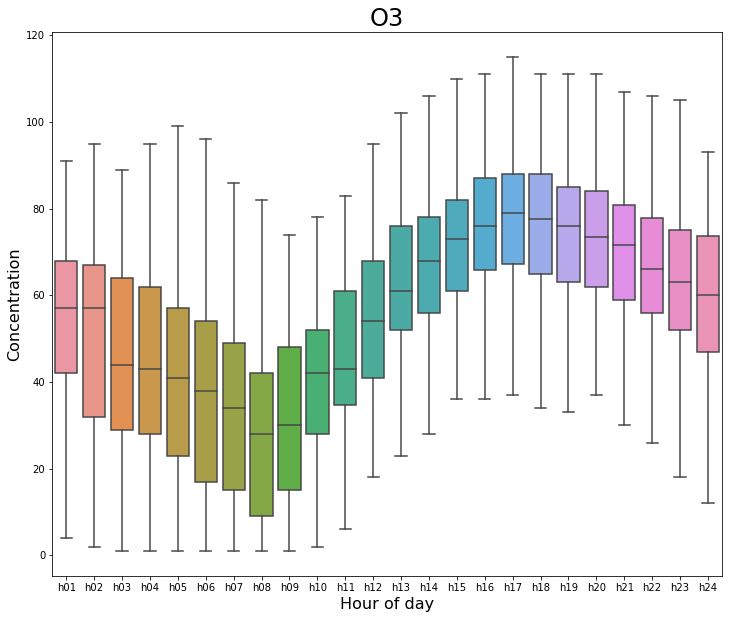

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
#dfContaminants[dfContaminants.contaminant=='PM10'].iloc[:,4:28]

fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(showfliers = False, x="variable", y="value", ax=ax,
            data=pd.melt(
                dfContaminants[(dfContaminants.contaminant=='SO2')
                               & (dfContaminants.fecha > '2020-03-15')
                              & (dfContaminants.fecha < '2020-06-22')].iloc[:,4:28]))

plt.xlabel("Hour of day", size=16)
plt.ylabel("Concentration", size=16)
plt.title("SO2", size=24)
plt.show()

fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(showfliers = False, x="variable", y="value", ax=ax,
            data=pd.melt(
                dfContaminants[(dfContaminants.contaminant=='CO')
                               & (dfContaminants.fecha > '2020-03-15')
                              & (dfContaminants.fecha < '2020-06-22')].iloc[:,4:28]))
plt.xlabel("Hour of day", size=16)
plt.ylabel("Concentration", size=16)
plt.title("CO", size=24)
plt.show()

fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(showfliers = False, x="variable", y="value", ax=ax,
            data=pd.melt(
                dfContaminants[(dfContaminants.contaminant=='NO')
                               & (dfContaminants.fecha > '2020-03-15')
                              & (dfContaminants.fecha < '2020-06-22')].iloc[:,4:28]))

plt.xlabel("Hour of day", size=16)
plt.ylabel("Concentration", size=16)
plt.title("NO", size=24)
plt.show()

fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(showfliers = False, x="variable", y="value", ax=ax,
            data=pd.melt(
                dfContaminants[(dfContaminants.contaminant=='NO2')
                               & (dfContaminants.fecha > '2020-03-15')
                              & (dfContaminants.fecha < '2020-06-22')].iloc[:,4:28]))

plt.xlabel("Hour of day", size=16)
plt.ylabel("Concentration", size=16)
plt.title("NO2", size=24)
plt.show()

fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(showfliers = False, x="variable", y="value", ax=ax,
            data=pd.melt(
                dfContaminants[(dfContaminants.contaminant=='PM10')
                               & (dfContaminants.fecha > '2020-03-15')
                              & (dfContaminants.fecha < '2020-06-22')].iloc[:,4:28]))

plt.xlabel("Hour of day", size=16)
plt.ylabel("Concentration", size=16)
plt.title("PM10", size=24)
plt.show()

fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(showfliers = False, x="variable", y="value", ax=ax,
            data=pd.melt(
                dfContaminants[(dfContaminants.contaminant=='NOX')
                               & (dfContaminants.fecha > '2020-03-15')
                              & (dfContaminants.fecha < '2020-06-22')].iloc[:,4:28]))

plt.xlabel("Hour of day", size=16)
plt.ylabel("Concentration", size=16)
plt.title("NOX", size=24)
plt.show()

fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(showfliers = False, x="variable", y="value", ax=ax,
            data=pd.melt(
                dfContaminants[(dfContaminants.contaminant=='O3')
                               & (dfContaminants.fecha > '2020-03-15')
                              & (dfContaminants.fecha < '2020-06-22')].iloc[:,4:28]))

plt.xlabel("Hour of day", size=16)
plt.ylabel("Concentration", size=16)
plt.title("O3", size=24)
plt.show()

In [23]:
# Impute the null values by setting them to the average value for the hour of day for the contaminant for the station.

#stations = ['Barcelona (Eixample)', 'Barcelona (Sants)']
#pollutants = ['SO2','CO','NO','NO2','PM10','NOX','O3']
#data_columns = ['h01','h02','h03','h04','h05','h06','h07','h08','h09','h10','h11','h12']

stations = ['Barcelona (Eixample)']
pollutants = pollutants = ['SO2','CO','NO','NO2','PM10','NOX','O3']
data_columns = ['h01','h02','h03','h04','h05','h06','h07','h08','h09','h10','h11','h12', \
                'h13','h14','h15','h16','h17','h18','h19','h20','h21','h22','h23','h24']
dfContaminants2=dfContaminants.copy()

for i in range(len(stations)):
    for j in range(len(pollutants)):
        for column in data_columns:
            print(stations[i],pollutants[j], column)
            mask = (dfContaminants['nom_estacio']==stations[i]) & (dfContaminants['contaminant']==pollutants[j])
            mean = dfContaminants.loc[mask, column].mean()
            dfContaminants2.loc[mask, column] = dfContaminants.loc[mask, column].fillna(mean)
    



Barcelona (Eixample) SO2 h01
Barcelona (Eixample) SO2 h02
Barcelona (Eixample) SO2 h03
Barcelona (Eixample) SO2 h04
Barcelona (Eixample) SO2 h05
Barcelona (Eixample) SO2 h06
Barcelona (Eixample) SO2 h07
Barcelona (Eixample) SO2 h08
Barcelona (Eixample) SO2 h09
Barcelona (Eixample) SO2 h10
Barcelona (Eixample) SO2 h11
Barcelona (Eixample) SO2 h12
Barcelona (Eixample) SO2 h13
Barcelona (Eixample) SO2 h14
Barcelona (Eixample) SO2 h15
Barcelona (Eixample) SO2 h16
Barcelona (Eixample) SO2 h17
Barcelona (Eixample) SO2 h18
Barcelona (Eixample) SO2 h19
Barcelona (Eixample) SO2 h20
Barcelona (Eixample) SO2 h21
Barcelona (Eixample) SO2 h22
Barcelona (Eixample) SO2 h23
Barcelona (Eixample) SO2 h24
Barcelona (Eixample) CO h01
Barcelona (Eixample) CO h02
Barcelona (Eixample) CO h03
Barcelona (Eixample) CO h04
Barcelona (Eixample) CO h05
Barcelona (Eixample) CO h06
Barcelona (Eixample) CO h07
Barcelona (Eixample) CO h08
Barcelona (Eixample) CO h09
Barcelona (Eixample) CO h10
Barcelona (Eixample) CO 

In [24]:
dfContaminants2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9786 entries, 5560 to 1561
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   nom_estacio    9786 non-null   object        
 1   fecha          9786 non-null   datetime64[ns]
 2   contaminant    9786 non-null   object        
 3   tipus_estacio  9786 non-null   object        
 4   h01            9786 non-null   float64       
 5   h02            9786 non-null   float64       
 6   h03            9786 non-null   float64       
 7   h04            9786 non-null   float64       
 8   h05            9786 non-null   float64       
 9   h06            9786 non-null   float64       
 10  h07            9786 non-null   float64       
 11  h08            9786 non-null   float64       
 12  h09            9786 non-null   float64       
 13  h10            9786 non-null   float64       
 14  h11            9786 non-null   float64       
 15  h12            978

In [25]:
dfContaminants2.tail(100)

,nom_estacio,fecha,contaminant,tipus_estacio,h01,h02,h03,h04,h05,h06,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
1328,Barcelona (Eixample),2020-10-17,PM10,traffic,17.0,19.000000,19.0,20.0,21.0,21.0,...,24.0,24.0,18.0,15.0,21.0,20.0,24.0,33.0,35.0,28.0
1320,Barcelona (Eixample),2020-10-17,SO2,traffic,1.0,1.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0
1421,Barcelona (Eixample),2020-10-18,CO,traffic,0.2,0.297876,0.2,0.2,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
1427,Barcelona (Eixample),2020-10-18,NO,traffic,4.0,18.000000,12.0,39.0,12.0,24.0,...,10.0,4.0,7.0,8.0,10.0,4.0,3.0,3.0,6.0,11.0
1433,Barcelona (Eixample),2020-10-18,NO2,traffic,52.0,69.000000,62.0,70.0,60.0,61.0,...,19.0,12.0,14.0,24.0,37.0,40.0,62.0,73.0,68.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,Barcelona (Eixample),2020-10-31,NO2,traffic,59.0,55.000000,56.0,57.0,49.0,43.0,...,24.0,21.0,23.0,30.0,27.0,43.0,57.0,68.0,66.0,51.0
1565,Barcelona (Eixample),2020-10-31,NOX,traffic,228.0,198.000000,170.0,178.0,81.0,69.0,...,37.0,30.0,32.0,40.0,33.0,62.0,79.0,122.0,121.0,66.0
1572,Barcelona (Eixample),2020-10-31,O3,traffic,1.0,1.000000,1.0,2.0,1.0,1.0,...,62.0,67.0,67.0,54.0,50.0,29.0,13.0,4.0,3.0,12.0
1563,Barcelona (Eixample),2020-10-31,PM10,traffic,45.0,38.000000,33.0,35.0,28.0,25.0,...,30.0,29.0,32.0,29.0,28.0,26.0,30.0,36.0,44.0,31.0


In [26]:
dfContaminants2.merge(dfValidWeather, left_on='fecha', right_on='fecha')

NameError: name 'dfValidWeather' is not defined